In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("breast_cancer.csv")

In [5]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df['Class'] = df['Class'].replace({2: 0, 4: 1})
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [8]:
X = df.drop(columns=['Sample code number', 'Class'])

In [9]:
y = df.Class

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
print("La máxima cantidad de nodos del modelo clasificador es", clf.tree_.max_depth)

La máxima cantidad de nodos del modelo clasificador es 8


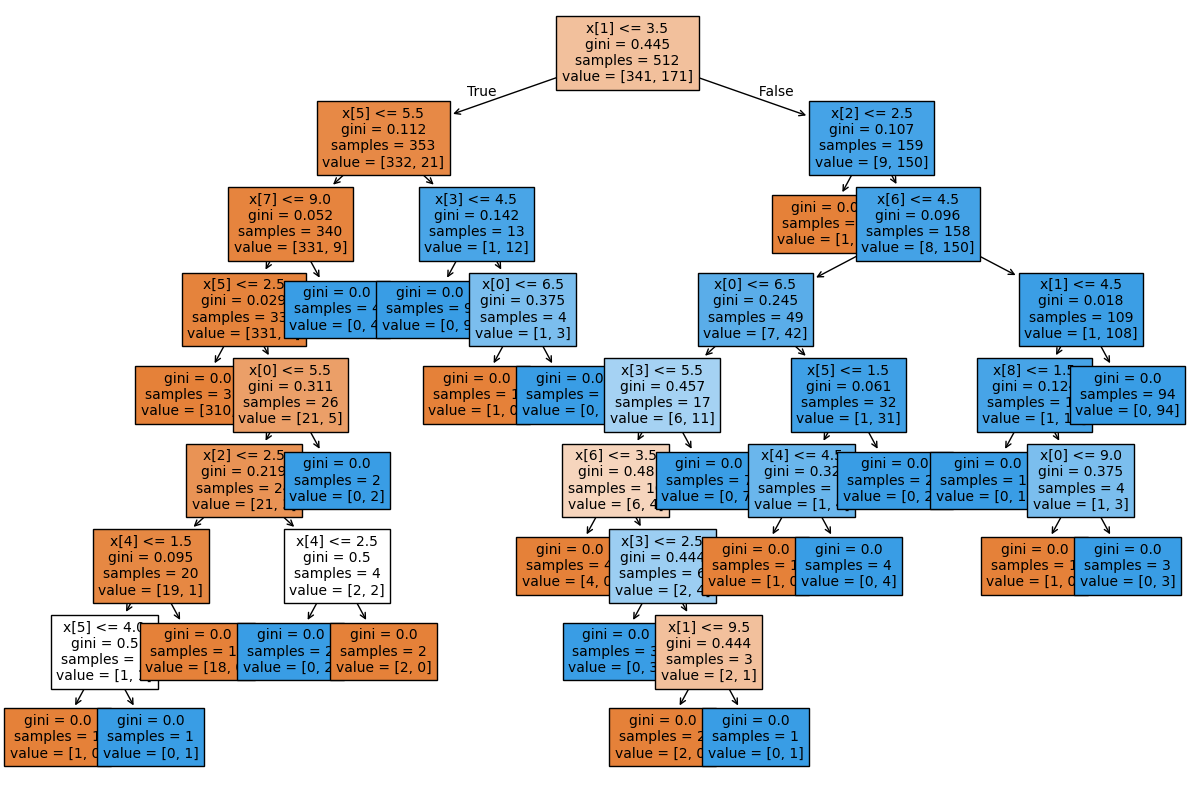

In [14]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.show()

In [15]:
y_pred = clf.predict(X_test)

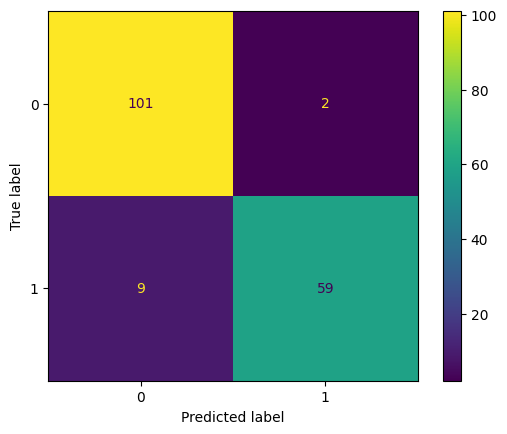

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

Optimización de hiperparámetros

In [17]:
train_ac = []
test_ac = []

max_deep_list = list(range(2,9))

for i in max_deep_list:
  clf2 = DecisionTreeClassifier(max_depth = i)
  clf2.fit(X_train, y_train)
  y_pred_train = clf2.predict(X_train)
  y_pred_test = clf2.predict(X_test)
  train_ac.append(accuracy_score(y_train,y_pred_train))
  test_ac.append(accuracy_score(y_test,y_pred_test))


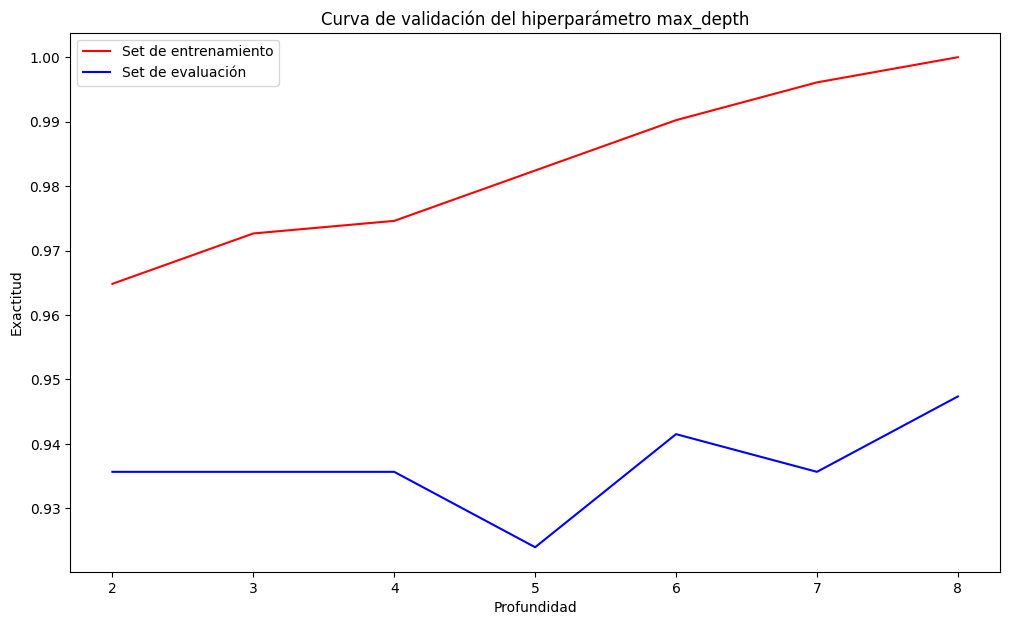

In [18]:
plt.figure(figsize=(12,7))
plt.plot(max_deep_list,train_ac,color='r',label="Set de entrenamiento")
plt.plot(max_deep_list,test_ac,color='b',label="Set de evaluación")
plt.title("Curva de validación del hiperparámetro max_depth")
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()



In [19]:
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8]}

clf2 = DecisionTreeClassifier()

clf2gvs= GridSearchCV(clf2, tree_para, cv=5)
clf2gvs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8]})

In [20]:
clf2gvs.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [21]:
score = pd.DataFrame(clf2gvs.cv_results_)
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004175,0.000388,0.003006,0.000185,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.951456,0.941748,0.950980,0.970588,0.941176,0.951190,0.010638,4
1,0.004314,0.000087,0.003101,0.000136,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.970874,0.951456,0.970588,0.970588,0.950980,0.962897,0.009538,1
2,0.005423,0.002497,0.003208,0.000705,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.970874,0.941748,0.941176,0.990196,0.941176,0.957034,0.020139,2
3,0.004127,0.000254,0.002992,0.000502,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.941748,0.961165,0.911765,0.950980,0.950980,0.943328,0.016935,12
4,0.004468,0.000216,0.002928,0.000053,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.922330,0.961165,0.921569,0.980392,0.950980,0.947287,0.022744,8
5,0.004205,0.000173,0.002841,0.000061,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.932039,0.941748,0.921569,0.970588,0.941176,0.941424,0.016328,13
6,0.008757,0.003728,0.006031,0.005298,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.932039,0.961165,0.931373,0.960784,0.941176,0.945307,0.013254,10
7,0.004117,0.000117,0.002922,0.000045,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.883495,0.922330,0.921569,0.911765,0.911765,0.910185,0.014103,14
8,0.011032,0.009668,0.004593,0.002041,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.922330,0.951456,0.941176,0.970588,0.931373,0.943385,0.016719,11
9,0.004213,0.000297,0.002840,0.000117,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.941748,0.961165,0.941176,0.960784,0.960784,0.953132,0.009531,3
